[View in Colaboratory](https://colab.research.google.com/github/schwaaweb/aimlds1_06-TheMachineLearningFramework/blob/master/W0_CCS--Solution_of_Logistic_Regression_Library_Coding_Challenge.ipynb)

# Separating classes with Logistic Regression

## Logistic Regression classifies

Linear regression makes a prediction: if `y = mx + b`. Logistic regression produces a probability, an estimate that `y` is either `0` or `1`.

Consider the following dataset:

In [1]:
# LAMBDA SCHOOL
# 
# MACHINE LEARNING
#
# MIT LICENSE

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.DataFrame()
data['x'] = np.array([3,0,5,2,1,0,0,5,6,4,1])
data['y'] = np.array([1,0,1,0,0,0,0,1,1,0,0])
print(data)

    x  y
0   3  1
1   0  0
2   5  1
3   2  0
4   1  0
5   0  0
6   0  0
7   5  1
8   6  1
9   4  0
10  1  0


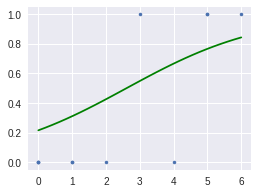

In [2]:
from sklearn.linear_model import LogisticRegression
regr = LogisticRegression()
regr.fit(data['x'].values.reshape(-1,1),data['y'].ravel())
y_hat = regr.predict(data['x'].values.reshape(-1,1))

plt.figure(figsize=(4,3))
plt.plot(data['x'],data['y'],'.')

smooth_x = np.linspace(0,6,30)
p = regr.coef_[0] * smooth_x + regr.intercept_
p = 1/(1+np.exp(-p))
plt.plot(smooth_x,p,'g');

In the above, the blue dots are the samples, and the green is the line of probability predicted by the logistic regression. When the logistic regression estimate `p(x) < 0.5, `y = 0`. When `p(x) >= 0.5`, `y = 1`. The next graph shows the prediction of the estimator: 

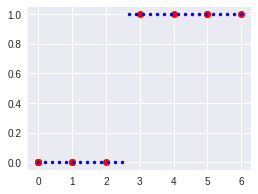

In [9]:
plt.figure(figsize=(4,3))
plt.plot(data['x'],regr.predict(data['x'].values.reshape(-1,1)),'or');
plt.plot(smooth_x,regr.predict(smooth_x.reshape(-1,1)),'.b')

### Challenge

Load the Motor Trend cars dataset at `https://www.dropbox.com/s/itcg6srrzn5u3fj/mtcars.csv?raw=1` and use the `fit` and `predict` functions of `sklearn.linear_model.LogisticRegression` to predict the two binomial columns from that dataset: `vs` and `am`. You choose which feature columns to use.

### Stretch goal

After fitting the model to predict `vs` and `am` on your chosen features, duplicate the above code that draws the sigmoid prediction function using `smooth_x`, `coef_`, and `intercept_`.

In [0]:
# Solve the coding challenge here.
data = pd.read_csv('https://www.dropbox.com/s/itcg6srrzn5u3fj/mtcars.csv?raw=1')

In [11]:
print(data.head())

          Unnamed: 0   mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
0          Mazda RX4  21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
1      Mazda RX4 Wag  21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
2         Datsun 710  22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
3     Hornet 4 Drive  21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
4  Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   

   carb  
0     4  
1     4  
2     1  
3     1  
4     2  


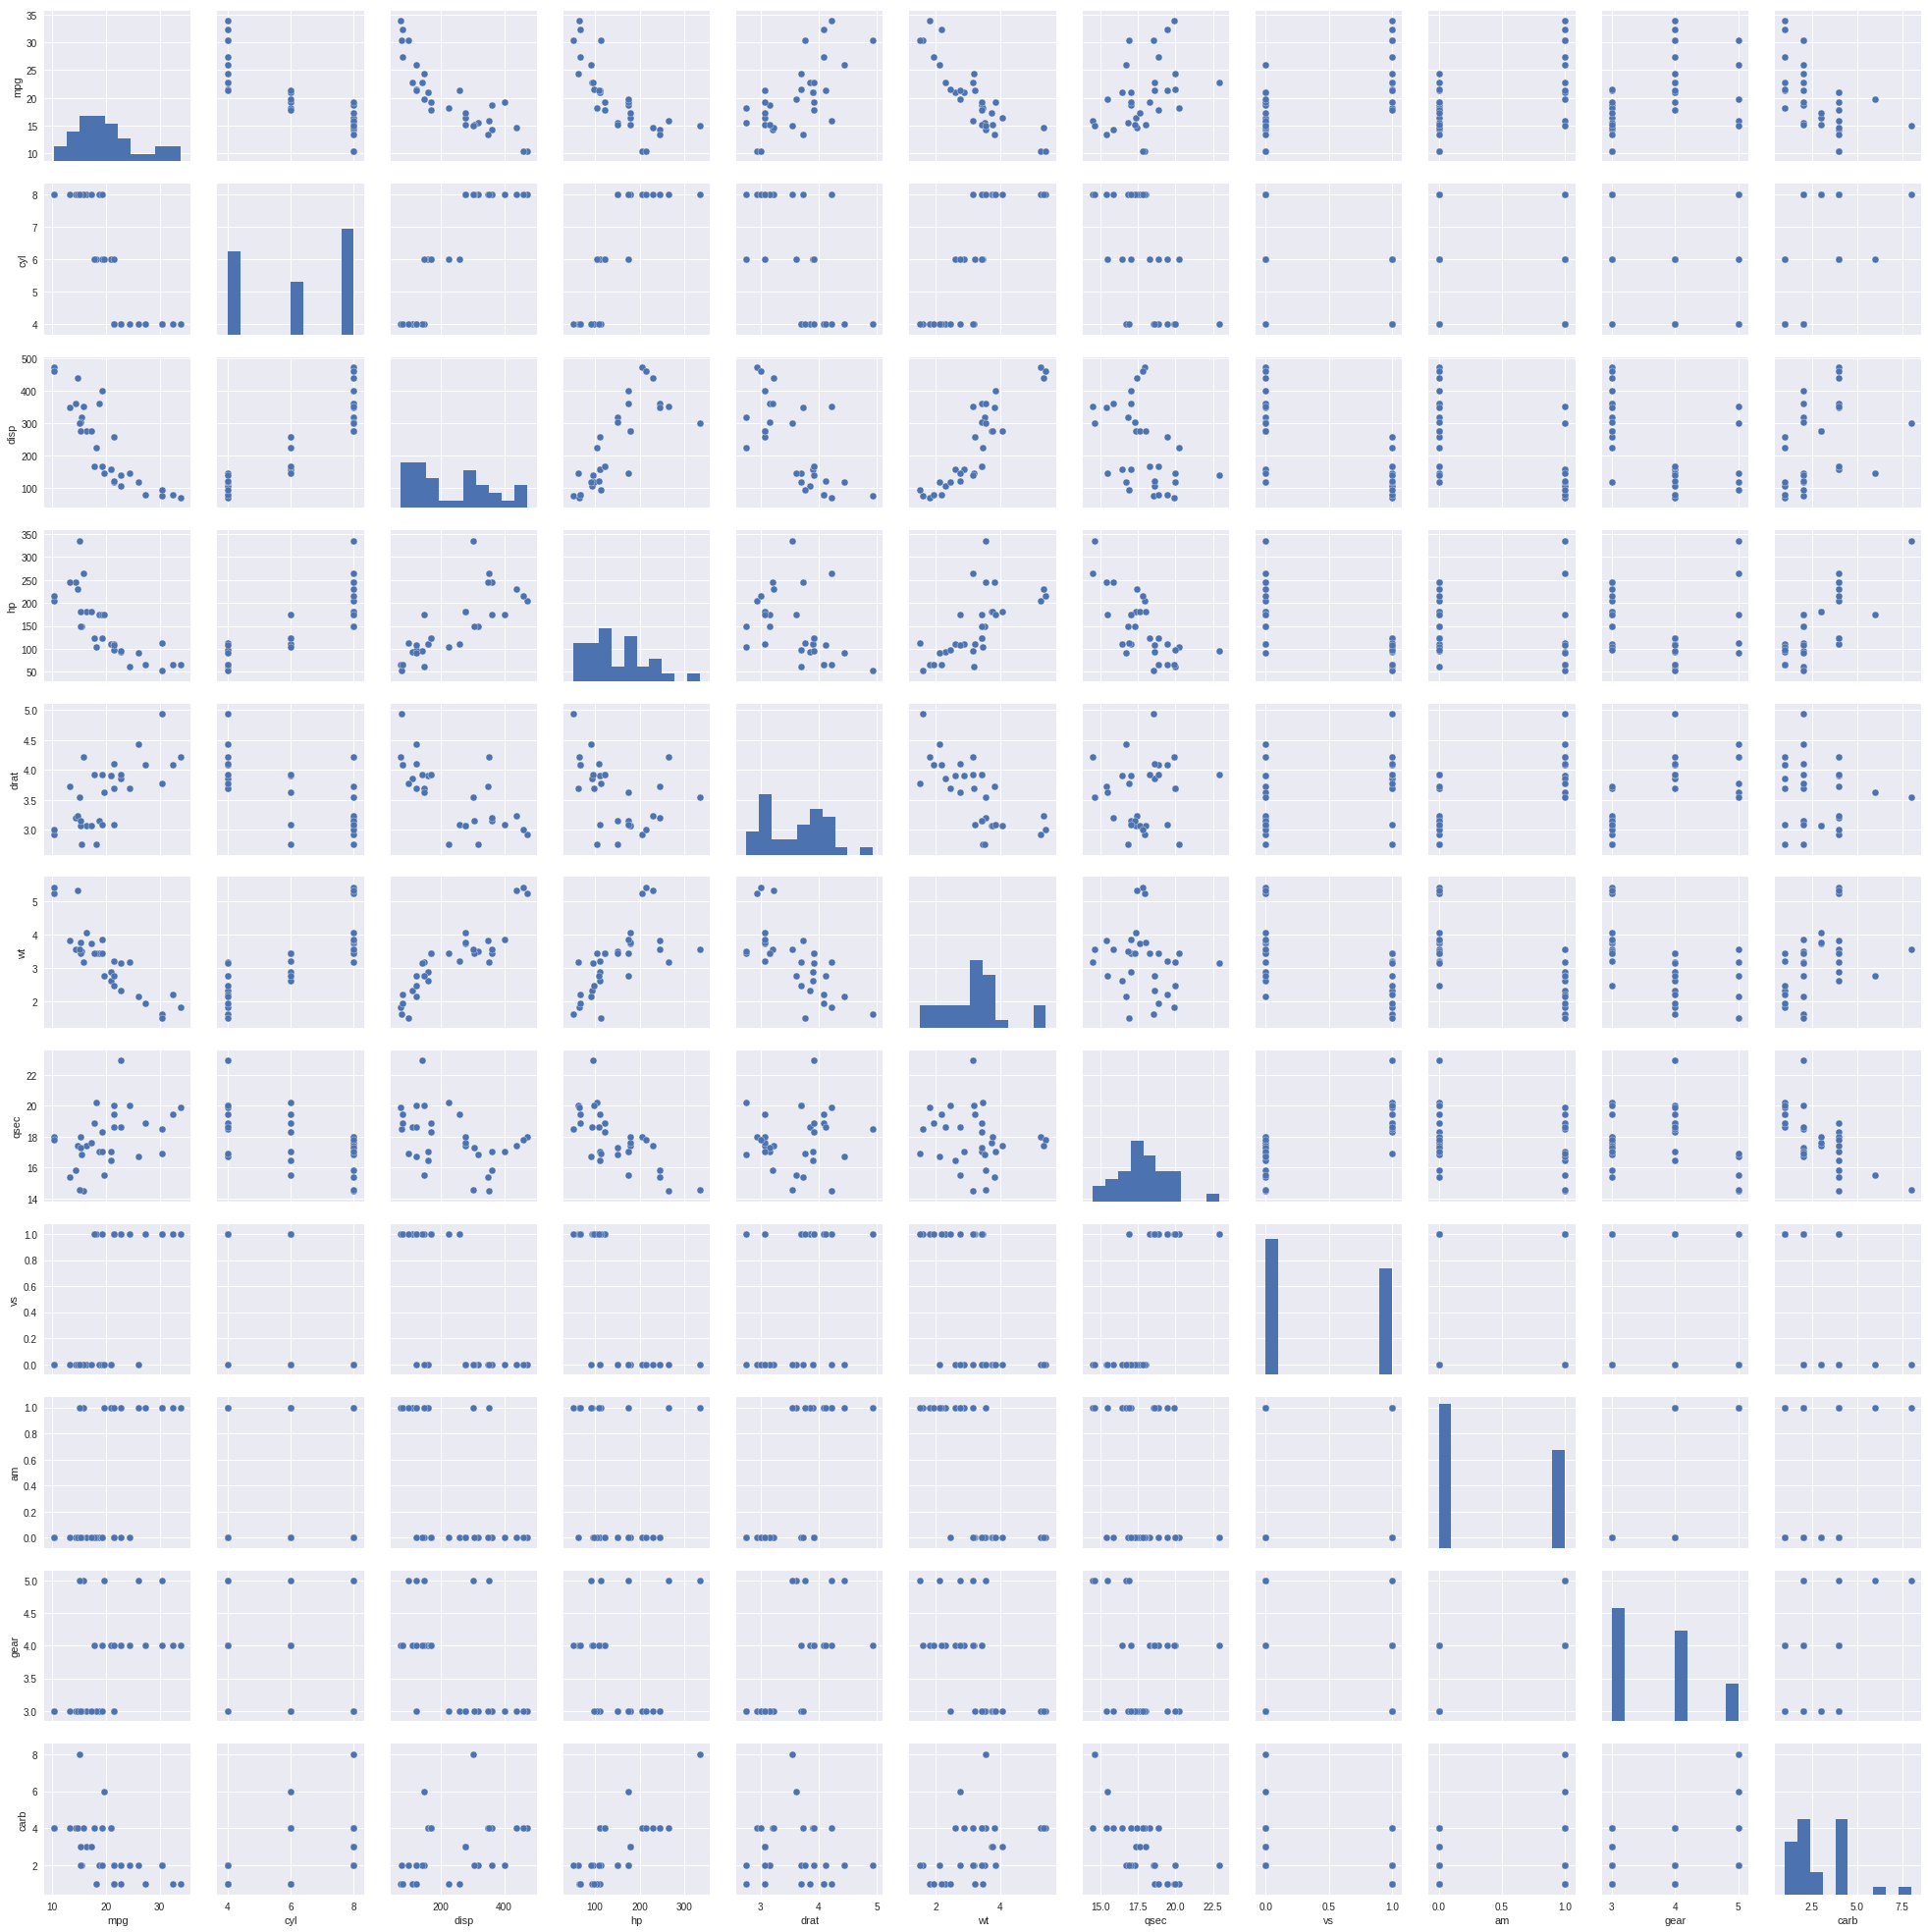

In [12]:
vs = data['vs']
am = data['am']

import seaborn as sns
sns.pairplot(data)

In [15]:
print(data.corr(method='spearman')['vs'])
print(data.corr(method='spearman')['am'])

mpg     0.706597
cyl    -0.813789
disp   -0.723664
hp     -0.751593
drat    0.447457
wt     -0.587016
qsec    0.791571
vs      1.000000
am      0.168345
gear    0.282662
carb   -0.633695
Name: vs, dtype: float64
mpg     0.562006
cyl    -0.522071
disp   -0.624068
hp     -0.362328
drat    0.686571
wt     -0.737713
qsec   -0.203332
vs      0.168345
am      1.000000
gear    0.807688
carb   -0.064365
Name: am, dtype: float64


In [22]:
# Train Three Logistic Regression classifiers
vs_regr = LogisticRegression()
am_regr = LogisticRegression()
vs_regr.fit(data[['mpg','cyl','disp','hp','qsec','carb']],vs)
am_regr.fit(data[['disp','drat','wt','gear']],am)
vs_mpg_regr = LogisticRegression()
vs_mpg_regr.fit(data[['mpg']],vs)

# Get predictions from all three
vs_predictions = vs_regr.predict(data[['mpg','cyl','disp','hp','qsec','carb']])
am_predictions = am_regr.predict(data[['disp','drat','wt','gear']])

# vs/mpg error
vs_mpg_predictions = vs_mpg_regr.predict(data[['mpg']])
vs_mpg_error = vs_mpg_predictions - data['vs']
print('vs/mpg error: ', sum(vs_mpg_error!=0)/len(vs_mpg_error))

# vs/all data error
vs_error = vs_predictions - data['vs']
print('vs error: ', sum(vs_error!=0)/len(vs_error))

# am/all data error
am_error = am_predictions - data['am']
print('am error: ', sum(am_error!=0)/len(am_error))

vs/mpg error:  0.1875
vs error:  0.03125
am error:  0.03125
